In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [ ]:
from google.colab import files
#Crear carpeta oculta en root .kaggle
!mkdir ~/.kaggle

#Cargar el archivo .json con el API Token
files._upload_file(filepath=r"/root/.kaggle/kaggle.json")

#Hacer la carpeta privada
!chmod 600 ~/.kaggle/kaggle.json

#Eliminar carpeta sample_data y archivos de ejemplo
!rm -rf sample_data

In [ ]:
#Descargar archivos de la competición
!kaggle competitions download -c udea-ai4eng-20242
#Descomprimir archivo
!unzip udea-ai4eng-20242.zip
#Eliminar archivo .zip
!rm udea-ai4eng-20242.zip
#Eliminar Archivos de ejemplo
!rm submission_example.csv

  0% 0.00/20.1M [00:00<?, ?B/s]
100% 20.1M/20.1M [00:00<00:00, 299MB/s]
Archive:  udea-ai4eng-20242.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np

z= pd.read_csv("train.csv")
z

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,bajo


ELIMINAR COLUMNAS QUE NO SE USARÁN

In [ ]:
def eliminar_columnas(z, bool_ESTU_PRGM_ACADEMICO):
  #Se elimina columna ID
  z = z.drop('ID', axis=1)

  if bool_ESTU_PRGM_ACADEMICO:
    #Se elimina columna ESTU_PRGM_ACADEMICO
    z= z.drop('ESTU_PRGM_ACADEMICO', axis=1)

  return z

ESTU_PRGM_ACADEMICO

In [ ]:
def ESTU_PRGM_ACADEMICO(z):
    #Función que se encarga de comparar elementos en una lista para arreglar
    #palabras que tengas signos de interrogación
    #Se reemplaza por una palabra con la mayor coincidencia
    def complete_list(data):
        def fix_word(word1, word2):
          result = [
              l2 if l1 == "?" else l1 if l2 == "?" else l1
              for l1, l2 in zip(word1, word2)
              ]
          return ''.join(result)

        n = len(data)
        for i in range(n):
            for j in range(i + 1, n):
                if len(data[i]) == len(data[j]):
                    data[i] = fix_word(data[i], data[j])
                    data[j] = fix_word(data[j], data[i])
        list_result = list(dict.fromkeys(data))
        return list_result

    #En base a una lista de referencia, busca elementos que coincidan en otra lista
    #y los reemplza
    def replace_elements(original_list, ref_list):
        set_ref = set(ref_list)

        final_list = []
        for elem in original_list:
            replace = False
            for ref in set_ref:
                if ref in elem:
                    final_list.append(ref)
                    replace = True
                    break
            if not replace:
                final_list.append(elem)

        return final_list

    !pip install unidecode
    from unidecode import unidecode
    #Resetear columna original. Quitar tildes y caracteres raros. Poner todo mayúscula
    ESTU_PRGM_ACADEMICO_Reset= z.ESTU_PRGM_ACADEMICO.transform(lambda x: unidecode(x).upper())
    #Filtrar por elementos únicos
    ESTU_PRGM_ACADEMICO_ELEMS= np.unique(ESTU_PRGM_ACADEMICO_Reset)
    #Extraer los primero 4 caracteres de la primer palabra.
    ESTU_PRGM_ACADEMICO_FIX=[val.split(" ")[0][0:4] for val in ESTU_PRGM_ACADEMICO_ELEMS]
    #Revisar elementos y completar palabras faltantes para dejar solo elementos únicos
    ESTU_PRGM_ACADEMICO_list= complete_list(sorted(np.unique(ESTU_PRGM_ACADEMICO_FIX)))
    #ESTU_PRGM_ACADEMICO_list[0]= "NEGO"
    #ESTU_PRGM_ACADEMICO_list.pop(50)
    #ESTU_PRGM_ACADEMICO_list.pop(72)
    #ESTU_PRGM_ACADEMICO_list.pop(80)
    #Comaprar las dos listas para cambiar a los nuevos valores
    ESTU_PRGM_ACADEMICO_vals= replace_elements(ESTU_PRGM_ACADEMICO_Reset, ESTU_PRGM_ACADEMICO_list)

    #A cada programa se le asignó un área en específico: Negocios, salud, ciencia, ingeniería, administración, salud, humanidades, licenciado
    cmap= {"3DEG": "NEGO","ACTI": "SALU","ACUI": "CIEN","AGRO": "CIEN","ANTR": "CIEN","ARQU": "INGE","ASTR": "CIEN","BACT": "CIEN","BANC": "ADMI",
    "BELL": "HUMA","BIOI": "INGE","BIOL": "CIEN","BIOQ": "CIEN","BIOT": "CIEN","CINE": "HUMA","COME": "ADMI","COMP": "INGE","COMU": "HUMA","ARTE": "HUMA",
    "CONS": "INGE","CONT": "CIEN","CREA": "HUMA","CRIM": "CIEN","CULI": "ARTE","CULT": "SALU","DANZ": "ARTE","DEPO": "SALU","DERE": "CIEN","DESA": "HUMA",
    "DIRE": "ARTE","DISE": "ARTE","ECOL": "CIEN","ECON": "CIEN","ENFE": "SALU","ENTR": "SALU","ESPA": "HUMA","ESTA": "CIEN","ESTU": "HUMA","FARM": "SALU",
    "FILO": "HUMA","FINA": "CIEN","FISI": "CIEN","FISI": "SALU","FONO": "CIEN","FORM": "CIEN","FOTO": "ARTE","ANIM": "ARTE","GAST": "CIEN","GEOC": "CIEN",
    "GERE": "ADMI","GERO": "CIEN","GEST": "ADMI","GOBI": "ADMI","HIST": "HUMA","HOTE": "ADMI","INST": "SALU","INTE": "ARTE","INVE": "CIEN","JURI": "CIEN",
    "LENG": "HUMA","LETR": "HUMA","LING": "HUMA","LITE": "HUMA","LOGI": "ADMI","MAES": "ARTE","MARK": "ADMI","MATE": "CIEN","MEDI": "SALU","MERC": "ADMI",
    "MICR": "CIEN","MUSI": "ARTE","NARR": "HUMA","NEGO": "ADMI","NUTR": "CIEN","OCEA": "CIEN","ODON": "SALU","OPTO": "SALU","PEDA": "HUMA","PERI": "HUMA",
    "PLAN": "HUMA","POLI": "ADMI","PROD": "CIEN","PROG": "HUMA","PSIC": "SALU","PUBL": "ADMI","QUMI": "CIEN","QUIM": "CIEN","REAL": "ARTE","RECR": "HUMA",
    "RELA": "CIEN","SEGU": "ADMI","SIST": "CIEN","SOCI": "HUMA","TEAT": "ARTE","TEOL": "CIEN","TERA": "CIEN","TRAB": "HUMA","TRAD": "HUMA","TURI": "ADMI",
    "URBA": "CIEN","ZOOT": "SALU","ARCH": "HUMA","BIBL": "HUMA","ADMI": "ADMI","INGE": "INGE","LICE": "LICE","INTR": "SALU","CIEN": "CIEN","GEOL": "CIEN",
    "SALU": "SALU", "GEOG": "CIEN","PROF": "PROF"}

    #Se reemplazan los nuevos elementos
    ESTU_PRGM_ACADEMICO_vals = np.r_[[cmap[i] for i in ESTU_PRGM_ACADEMICO_vals]]

    #Se reemplazan los nuevos valores de la columna ESTU_PRGM_ACADEMICO
    z.ESTU_PRGM_ACADEMICO= ESTU_PRGM_ACADEMICO_vals

    #Crear matriz identidad con la longitud de ESTU_PRGM_ACADEMICO_vals
    mat_id= np.eye(len(ESTU_PRGM_ACADEMICO_vals))

    #Oneshot mapping
    ESTU_PRGM_ACADEMICO_onehot_vals= {val: mat_id[i] for i,val in enumerate(ESTU_PRGM_ACADEMICO_vals)}
    ESTU_PRGM_ACADEMICO_onehot_vals

    # Use a dictionary to map program names to indices
    program_to_index = {val: i for i, val in enumerate(np.unique(ESTU_PRGM_ACADEMICO_vals))}

    # Create a sparse matrix to represent one-hot encoding
    import scipy.sparse as sparse

    row_indices = [i for i in range(len(ESTU_PRGM_ACADEMICO_vals))]
    col_indices = [program_to_index[val] for val in ESTU_PRGM_ACADEMICO_vals]
    data = [1] * len(ESTU_PRGM_ACADEMICO_vals)

    ESTU_PRGM_ACADEMICO_onehot = sparse.csc_matrix((data, (row_indices, col_indices)), shape=(len(ESTU_PRGM_ACADEMICO_vals), len(program_to_index)))

    #Convertir ESTU_PRGM_ACADEMICO_onehot_array nuevamente en numpy.array
    ESTU_PRGM_ACADEMICO_onehot_array = ESTU_PRGM_ACADEMICO_onehot.toarray()
    ESTU_PRGM_ACADEMICO_onehot_array

    #Se crean las nuevas columnas
    ESTU_PRGM_ACADEMICO_df = pd.DataFrame(ESTU_PRGM_ACADEMICO_onehot_array, columns=[f"ESTU_PRGM_ACADEMICO__{v}" for v in ESTU_PRGM_ACADEMICO_onehot_vals])

    #Se reemplaza ESTU_PRGM_ACADEMICO por las nuevas columnas
    z = pd.concat([ESTU_PRGM_ACADEMICO_df, z], axis=1).drop('ESTU_PRGM_ACADEMICO', axis=1)

    return z


PERIODO

In [ ]:
def PERIODO(z):
  #Se transforman elementos en String para filtrarlos luego
  z.PERIODO= z.PERIODO.transform(lambda x: int(str(x)[0:4]))

  #Se reemplazan todos los años anteriores al 2000 por 0, mayores al 2000 por 1
  z.PERIODO.values[z.PERIODO < 2000] = 0
  z.PERIODO.values[z.PERIODO >= 2000] = 1

  return z

ESTU_PRGM_DEPARTAMENTO

In [ ]:
def ESTU_PRGM_DEPARTAMENTO(z):
  x = z.ESTU_PRGM_DEPARTAMENTO.values
  ESTU_PRGM_DEPARTAMENTO_vals = sorted(np.unique(x))
  ESTU_PRGM_DEPARTAMENTO_onehot_vals = {val: np.eye(len(ESTU_PRGM_DEPARTAMENTO_vals))[i] for i,val in enumerate(ESTU_PRGM_DEPARTAMENTO_vals)}

  #Concatenar los valores
  ESTU_PRGM_DEPARTAMENTO_onehot_enc = np.r_[[ESTU_PRGM_DEPARTAMENTO_onehot_vals[i] for i in z.ESTU_PRGM_DEPARTAMENTO]]

  #Reemplzar valores
  ESTU_PRGM_DEPARTAMENTO_df = pd.DataFrame(ESTU_PRGM_DEPARTAMENTO_onehot_enc, columns=[f"ESTU_PRGM_DEPARTAMENTO__{v}" for v in ESTU_PRGM_DEPARTAMENTO_onehot_vals])

  #Reemplzar valores
  ESTU_PRGM_DEPARTAMENTO_df = pd.DataFrame(ESTU_PRGM_DEPARTAMENTO_onehot_enc, columns=[f"ESTU_PRGM_DEPARTAMENTO__{v}" for v in ESTU_PRGM_DEPARTAMENTO_onehot_vals])

  z = pd.concat([ESTU_PRGM_DEPARTAMENTO_df, z], axis=1).drop('ESTU_PRGM_DEPARTAMENTO', axis=1)

  return z

ESTU_VALORMATRICULAUNIVERSIDAD

In [ ]:
def ESTU_VALORMATRICULAUNIVERSIDAD(z):
  #Se reemplazan por "no info"
  z.ESTU_VALORMATRICULAUNIVERSIDAD.values[z.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'

  #Se reemplazan nuevos valores de cmap en el dataframe
  cmap = {'Entre 1 millón y menos de 2.5 millones': 1.75,
  'Entre 2.5 millones y menos de 4 millones': 3.25,
  'Menos de 500 mil': 0.5,
  'Entre 500 mil y menos de 1 millón': .75,
  'Entre 4 millones y menos de 5.5 millones': 4.75,
  'Más de 7 millones': 7,
  'Entre 5.5 millones y menos de 7 millones': 6.25,
  'No pagó matrícula': 0,
  'no info': -1}

  #Reemplaza los valores del JSON en el dataframe
  z.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[cmap[i] for i in z.ESTU_VALORMATRICULAUNIVERSIDAD]]

  return z

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ESTU_VALORMATRICULAUNIVERSIDAD(z)
# Visualizar la distribución de los valores de matrícula
sns.histplot(z['ESTU_VALORMATRICULAUNIVERSIDAD'], kde=True)
plt.title('Distribución de Valores de Matrícula Universitaria')
plt.show()


ESTU_HORASSEMANATRABAJA

In [ ]:
def ESTU_HORASSEMANATRABAJA(z):
  #Se modifican valores vacíos por un "0"
  z.ESTU_HORASSEMANATRABAJA.values[z.ESTU_HORASSEMANATRABAJA.isna()] = "0"

  #Se reemplazan nuevos valores de cmap en el dataframe
  cmap= {'0': 0, 'Entre 11 y 20 horas': 1.55, 'Entre 21 y 30 horas': 2.55,
        'Menos de 10 horas': 1.0, 'Más de 30 horas': 3.0}

  z.ESTU_HORASSEMANATRABAJA = np.r_[[cmap[i] for i in z.ESTU_HORASSEMANATRABAJA]]

  return z

FAMI_ESTRATOVIVIENDA

In [ ]:
def FAMI_ESTRATOVIVIENDA(z):
  #Se reemplaza na por "Sin estrato"
  z.FAMI_ESTRATOVIVIENDA.values[z.FAMI_ESTRATOVIVIENDA.isna()] = 'Sin Estrato'

  cmap= {'Estrato 1': 1, 'Estrato 2': 2, 'Estrato 3': 3, 'Estrato 4': 4, 'Estrato 5': 5,
        'Estrato 6': 6, 'Sin Estrato': 0}

  z.FAMI_ESTRATOVIVIENDA = np.r_[[cmap[i] for i in z.FAMI_ESTRATOVIVIENDA]]

  return z

FAMI_TIENEINTERNET

In [ ]:
def FAMI_TIENEINTERNET(z):
  #Se reemplazan datos faltantes por No
  z.FAMI_TIENEINTERNET.values[z.FAMI_TIENEINTERNET.isna()] = "No"

  #Se crea Onehot
  x = z.FAMI_TIENEINTERNET.values
  FAMI_TIENEINTERNET_vals = sorted(np.unique(x))
  FAMI_TIENEINTERNET_onehot_vals = {val: np.eye(len(FAMI_TIENEINTERNET_vals))[i] for i,val in enumerate(FAMI_TIENEINTERNET_vals)}

  FAMI_TIENEINTERNET_onehot_enc = np.r_[[FAMI_TIENEINTERNET_onehot_vals[i] for i in z.FAMI_TIENEINTERNET]]

  #Crear nuevas columnas
  FAMI_TIENEINTERNET_df = pd.DataFrame(FAMI_TIENEINTERNET_onehot_enc, columns=[f"FAMI_TIENEINTERNET__{v}" for v in FAMI_TIENEINTERNET_onehot_vals])

  #Crear nuevas columnas en dataframe original.
  z = pd.concat([FAMI_TIENEINTERNET_df, z], axis=1).drop('FAMI_TIENEINTERNET', axis=1)

  return z

FAMI_EDUCACIONPADRE y FAMI_EDUCACIONPADRE

In [ ]:
def FAMI_EDUCACIONPADRE_FAMI_EDUCACIONMADRE(z):
  #Cambiar valores na por "no info"
  z.FAMI_EDUCACIONPADRE.values[z.FAMI_EDUCACIONPADRE.isna()] = 'no info'
  z.FAMI_EDUCACIONMADRE.values[z.FAMI_EDUCACIONMADRE.isna()] = 'no info'

  #Eliminar valores "No sabe" y "No aplica" por "No info"
  z = z.copy()
  z.FAMI_EDUCACIONPADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in z.FAMI_EDUCACIONPADRE.values]
  z.FAMI_EDUCACIONMADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in z.FAMI_EDUCACIONMADRE.values]

  x= z.FAMI_EDUCACIONPADRE.values
  y= z.FAMI_EDUCACIONMADRE.values

  #Valores filtrados
  FAMI_EDUCACIONPADRE_vals= sorted(np.unique(x))
  FAMI_EDUCACIONMADRE_vals= sorted(np.unique(x))

  #Onehot
  FAMI_EDUCACIONPADRE_vals = sorted(np.unique(x))
  FAMI_EDUCACIONPADRE_onehot_vals = {val: np.eye(len(FAMI_EDUCACIONPADRE_vals))[i] for i,val in enumerate(FAMI_EDUCACIONPADRE_vals)}

  FAMI_EDUCACIONMADRE_vals = sorted(np.unique(y))
  FAMI_EDUCACIONMADRE_onehot_vals = {val: np.eye(len(FAMI_EDUCACIONMADRE_vals))[i] for i,val in enumerate(FAMI_EDUCACIONMADRE_vals)}

  FAMI_EDUCACIONPADRE_onehot_enc = np.r_[[FAMI_EDUCACIONPADRE_onehot_vals[i] for i in z.FAMI_EDUCACIONPADRE]]
  FAMI_EDUCACIONMADRE_onehot_enc = np.r_[[FAMI_EDUCACIONMADRE_onehot_vals[i] for i in z.FAMI_EDUCACIONMADRE]]

  #Agregar nuevos valores y columnas al Dataframe
  FAMI_EDUCACIONPADRE_df = pd.DataFrame(FAMI_EDUCACIONPADRE_onehot_enc, columns=[f"FAMI_EDUCACIONPADRE__{v}" for v in FAMI_EDUCACIONPADRE_onehot_vals])
  z = pd.concat([FAMI_EDUCACIONPADRE_df, z], axis=1).drop('FAMI_EDUCACIONPADRE', axis=1)

  FAMI_EDUCACIONMADRE_df = pd.DataFrame(FAMI_EDUCACIONMADRE_onehot_enc, columns=[f"FAMI_EDUCACIONMADRE__{v}" for v in FAMI_EDUCACIONMADRE_onehot_vals])
  z = pd.concat([FAMI_EDUCACIONMADRE_df, z], axis=1).drop('FAMI_EDUCACIONMADRE', axis=1)

  return z

ESTU_PAGOMATRICULAPROPIO

In [ ]:
def ESTU_PAGOMATRICULAPROPIO(z):
  #Reemplazar valores Na por No
  z.ESTU_PAGOMATRICULAPROPIO.values[z.ESTU_PAGOMATRICULAPROPIO.isna()] = "No"

  z.ESTU_PAGOMATRICULAPROPIO.values[z.ESTU_PAGOMATRICULAPROPIO == "Si"] = 1
  z.ESTU_PAGOMATRICULAPROPIO.values[z.ESTU_PAGOMATRICULAPROPIO == "No"] = 0

  return z

RENDIMIENTO_GLOBAL

In [ ]:
def RENDIMIENTO_GLOBAL(z):
  cmap_global= {'alto':3, 'bajo':0, 'medio-alto':2, 'medio-bajo':1}

  #Intercambiar valores por números dados
  z.RENDIMIENTO_GLOBAL = np.r_[[cmap_global[i] for i in z.RENDIMIENTO_GLOBAL]]

  return z

In [ ]:
#Creación de archivo Train_Final
#Si se pasa True, se elimina columna ESTU_PRGM_ACADEMICO
z= eliminar_columnas(z, True)
#z= ESTU_PRGM_ACADEMICO()
z= PERIODO(z)
z= ESTU_PRGM_DEPARTAMENTO(z)
z= ESTU_VALORMATRICULAUNIVERSIDAD(z)
z= ESTU_HORASSEMANATRABAJA(z)
z= FAMI_ESTRATOVIVIENDA(z)
z= FAMI_TIENEINTERNET(z)
z= FAMI_EDUCACIONPADRE_FAMI_EDUCACIONMADRE(z)
z= ESTU_PAGOMATRICULAPROPIO(z)
z= RENDIMIENTO_GLOBAL(z)

TABLA FINAL

In [ ]:
z

,FAMI_EDUCACIONMADRE__Educación profesional completa,FAMI_EDUCACIONMADRE__Educación profesional incompleta,FAMI_EDUCACIONMADRE__Ninguno,FAMI_EDUCACIONMADRE__Postgrado,FAMI_EDUCACIONMADRE__Primaria completa,FAMI_EDUCACIONMADRE__Primaria incompleta,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE__Técnica o tecnológica completa,FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta,...,ESTU_PRGM_DEPARTAMENTO__SUCRE,ESTU_PRGM_DEPARTAMENTO__TOLIMA,ESTU_PRGM_DEPARTAMENTO__VALLE,ESTU_PRGM_DEPARTAMENTO__VAUPES,PERIODO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,6.25,1.00,3,0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1,3.25,0.00,3,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,3.25,3.00,3,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,4.75,0.00,4,0,3
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,3.25,2.55,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0.75,1.55,2,1,2
692496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,3.25,3.00,3,0,0
692497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,1.75,1.00,3,1,1
692498,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1,3.25,1.00,1,1,0


In [ ]:
#Se crea una copia para poder trabar desde este punto
pd.DataFrame(z).to_csv("train_final.csv")

Carga archivo Train----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np

z= pd.read_csv("train_final.csv")
z.drop('Unnamed: 0', axis=1, inplace=True)

Creación de modelo para entrenar

In [ ]:
y_col = 'RENDIMIENTO_GLOBAL'
zs = z[sorted(z.columns)]

X = zs[[c for c in zs.columns if c!=y_col]].values
y = zs[y_col].values
X.shape, y.shape

((692500, 60), (692500,))

Separar entre train y test

In [ ]:
from sklearn.model_selection import train_test_split

Xtr, Xts, ytr, yts = train_test_split(X,y, train_size=0.8)
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((554000, 60), (138500, 60), (554000,), (138500,))

Modelo RandomForestClassifier para clasificación

In [ ]:
#De momento la mejor opción
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#lr = LogisticRegression(max_iter=10000)
lr = RandomForestClassifier(max_samples=554000)
#lr = SVC(kernel='linear')
lr.fit(Xtr, ytr)
print('El Score obtenido: '+str (lr.score(X,y)))

El Score obtenido: 0.5706599277978339


Predicciones

In [ ]:
preds_tr = lr.predict(Xtr)
preds_ts = lr.predict(Xts)

In [ ]:
print (preds_tr[:20])
print (preds_ts[:20])

[0 1 0 1 0 2 0 0 3 3 0 3 3 1 2 0 3 3 1 0]
[1 3 0 2 2 3 3 0 3 1 1 0 1 0 0 0 0 3 3 3]


In [ ]:
np.mean(preds_tr==ytr), np.mean(preds_ts==yts)

(0.6219079422382672, 0.3656678700361011)

In [ ]:
!pip install rlxutils

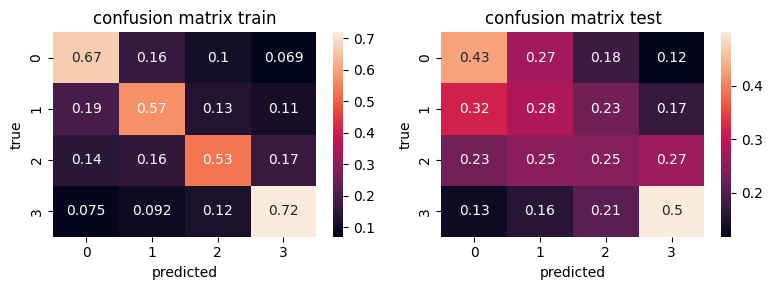

In [ ]:

import matplotlib.pyplot as plt
from rlxutils import subplots
from sklearn.metrics import confusion_matrix

cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)

# normalize by class
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1,1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1,1)

import seaborn as sns
for ax,i in subplots(2, usizex=4):
  if i==0: sns.heatmap(cm_tr, annot=True); plt.title("confusion matrix train")
  if i==1: sns.heatmap(cm_ts, annot=True); plt.title("confusion matrix test")
  plt.ylabel("true")
  plt.xlabel("predicted")

Cargar archivo test.csv

In [ ]:
zt = pd.read_csv("test.csv")
zt = zt.drop('Unnamed: 0', axis=1)

In [ ]:
#Almacenar IDs
zt_ids = zt['ID'].values

In [ ]:
#Eliminar columna ID
zt = zt.drop('ID', axis=1)
zt= zt.drop('ESTU_PRGM_ACADEMICO', axis=1)

Se toma todo el código anterior para organizar las columnas del archivo test.csv

In [ ]:
#Creación de archivo Test_Final
#Si se pasa True, se elimina columna ESTU_PRGM_ACADEMICO
zt= eliminar_columnas(zt, True)
#z= ESTU_PRGM_ACADEMICO()
zt= PERIODO(zt)
zt= ESTU_PRGM_DEPARTAMENTO(zt)
zt= ESTU_VALORMATRICULAUNIVERSIDAD(zt)
zt= ESTU_HORASSEMANATRABAJA(zt)
zt= FAMI_ESTRATOVIVIENDA(zt)
zt= FAMI_TIENEINTERNET(zt)
zt= FAMI_EDUCACIONPADRE_FAMI_EDUCACIONMADRE(zt)
zt= ESTU_PAGOMATRICULAPROPIO(zt)
zt= RENDIMIENTO_GLOBAL(zt)

In [ ]:
#Trabla Test final
zt

In [ ]:
pd.DataFrame(zt).to_csv("test_final.csv")

Leer archivo test_final de cero ---------------------------------------------------------------------------------------

In [ ]:
zt= pd.read_csv("test_final.csv")
zt.drop('Unnamed: 0', axis=1, inplace=True)


Crear array x y predecir

In [ ]:
X_test_data = zt[sorted(zt.columns)].values
X_test_data.shape

(296786, 60)

In [ ]:
preds_test_data = lr.predict(X_test_data)

In [ ]:
# inverse mapping
cmap_global= {'alto':3, 'bajo':0, 'medio-alto':2, 'medio-bajo':1}

rmapi = {v:k for k,v in cmap_global.items()}
text_preds_test_data = [rmapi[i] for i in preds_test_data]

In [ ]:
#text_preds_test_data = [rmapi[i] for i in preds_test_data_prox]

In [ ]:
# create dataframe

submission = pd.DataFrame([zt_ids, text_preds_test_data], index=['ID', 'RENDIMIENTO_GLOBAL']).T
submission

,ID,RENDIMIENTO_GLOBAL
0,550236,medio-bajo
1,98545,medio-bajo
2,499179,bajo
3,782980,medio-bajo
4,785185,bajo
...,...,...
296781,496981,medio-alto
296782,209415,medio-alto
296783,239074,medio-alto
296784,963852,alto


In [ ]:
# save to file ready to submit
submission.to_csv("my_submission7.csv", index=False)